# Predicting Insurance Costs

This project will utilize a Medical Cost Data Set from Kaggle which contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of th person who received it. The purpose of this guided project is to use linear regression modeling in to predict the total medical cost based on the demographic and personel characteristics.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# importing libraries

### Data Profiling

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

# importing data and viewing top 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

# checking data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

# reviewing summary stats for numerical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

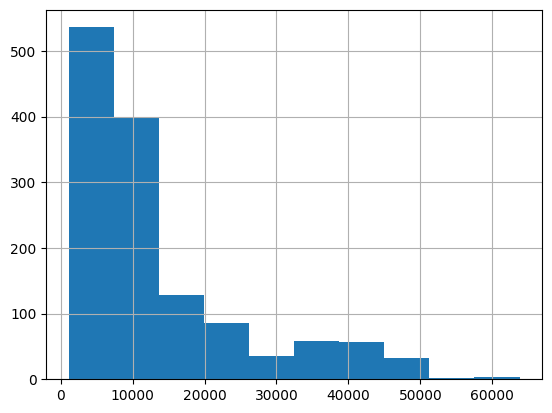

In [5]:
insurance["charges"].hist()

In [6]:
insurance["log_charges"] = np.log2(insurance["charges"])
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


<AxesSubplot:>

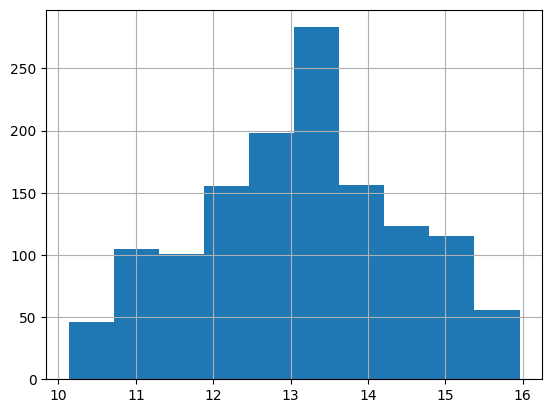

In [7]:
insurance["log_charges"].hist()

The data is highly skewed right and therefore a log transformation will transform to be more normally distributed, causing the standard error to be more consistent througout using a linear predictor

In [8]:
correlations = insurance.corr()
correlations

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


<AxesSubplot:title={'center':'log_charges'}, xlabel='smoker'>

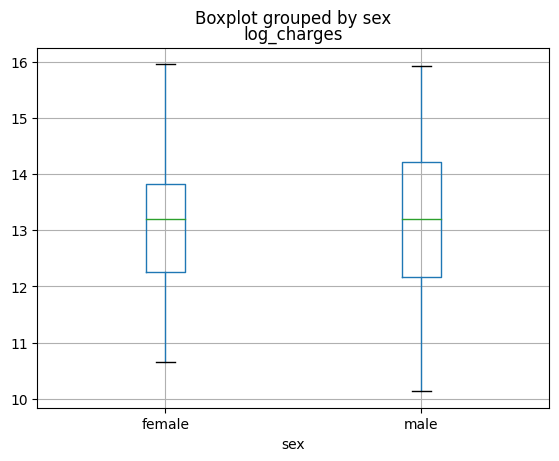

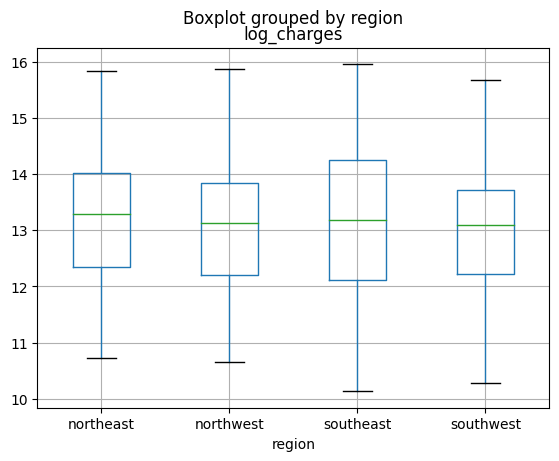

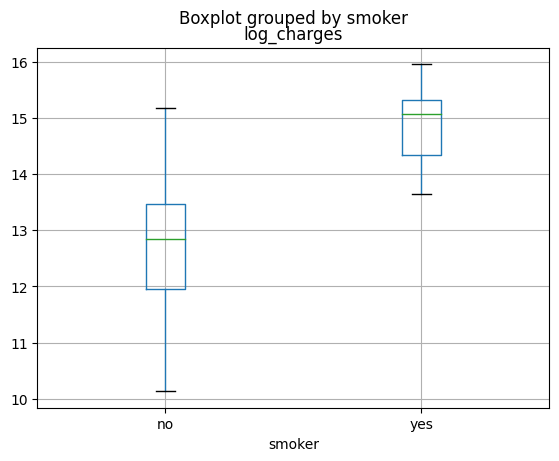

In [9]:
insurance.boxplot(column = ["log_charges"], by = "sex")
insurance.boxplot(column = ["log_charges"], by = "region")
insurance.boxplot(column = ["log_charges"], by = "smoker")

# examining the distribution for categorical variables

Based on the analysis above, age is a decent predictor based on the correlation coefficient of 52% and smoking is clearly associated with higher medical costs per the boxplot. Sex and region don't seem to have any significant differences in distributions. We will include these two feature variables in our model.

### Creating & Verifying Linear Model Validitiy

In [10]:
insurance["smoker_updated"] = insurance["smoker"].map({"yes": 1, "no": 0})

# creates a numerical representation of the smoker column for the model

In [11]:
X = insurance[["smoker_updated", "age"]]
y = insurance["log_charges"]

# defines our predictor and feature variables

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 11)

# splits to model randomly in to a train and test seet

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

# creates model and fits to training set

LinearRegression()

In [14]:
y_pred = model.predict(X_train)

mean_squared_error(y_train, y_pred)

# calculates the mean squared error bewteen the predicted y values and actual y values

0.46287997752433424

In [15]:
model.coef_

# coefficients for smoking and age

array([2.20989084, 0.05215909])

In [16]:
r2_score(y_train, y_pred)

# R squared value

0.739569195327408

Per an initial look the model looks like it works well.  It has a low MSE and high R squared value. Smoking has a much higher coefficient than age meaning it is a higher driver of the model's predictions.

### Examining Residuals

<AxesSubplot:xlabel='fitted', ylabel='residuals'>

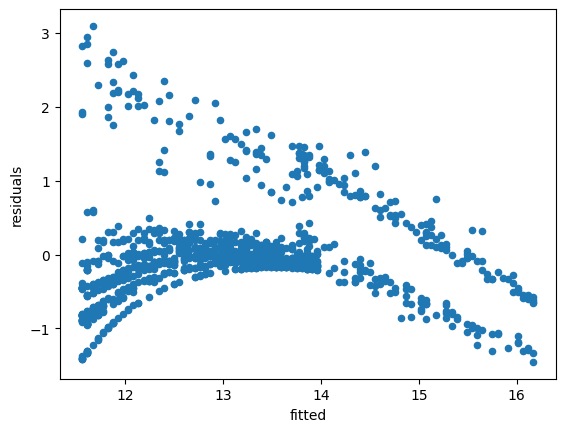

In [17]:
residuals_plot = pd.DataFrame()
residuals_plot["residuals"] = y_train - y_pred
residuals_plot["fitted"] = y_pred

residuals_plot.plot.scatter(x = "fitted", y = "residuals")

# plots the residuals in relation to the fitted/y_predication values

Based on this plot above we can see the values are not evenly distributed around zero throughtout the fitted values. This means the model may not be the best to use.

### Evaluating the Test Set

In [19]:
test_pred = model.predict(X_test)
mean_squared_error(y_test, test_pred)

# calculating MSE on the test set

0.4398252420452903

### Model Summary

Per our MSE of the test set, it appears the model did not overfit as the MSE is slightly higher on the training set. The model overall is not great based on the distribution of residuals. We can see the fitted values tend to underestimate our predictor (charges) for higher values. The residuals even appear slightly quadratic. The model might be improved utilizing quadratic features